## 기술 통계

### 공통 코드

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기
import warnings
warnings.filterwarnings('ignore')

### 상관계수

#### 피어슨 상관계수(일반적인 상관계수)

In [5]:
# 피어슨 상관계수 
# 공분산 : sum((x- x 평균) * (y - y의 평균)) / N-1
# N으로 나누면 편향, N-1로 나누면 편향
# 분산을 알기 위해서는 평균이라는 값을 하나 구해야하기 때문

# 피어슨 상관계수 : 공분산 / (x의 표편)(y의 표편)
# -1 < corr <1 로 표준화가 된다

# 데이터 불러오기 
mpg = pd.read_csv('./data/auto-mpg.csv', header= None)
mpg.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration',
             'model year','origin','name']
# print(mpg.head())
# mpg.info()
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


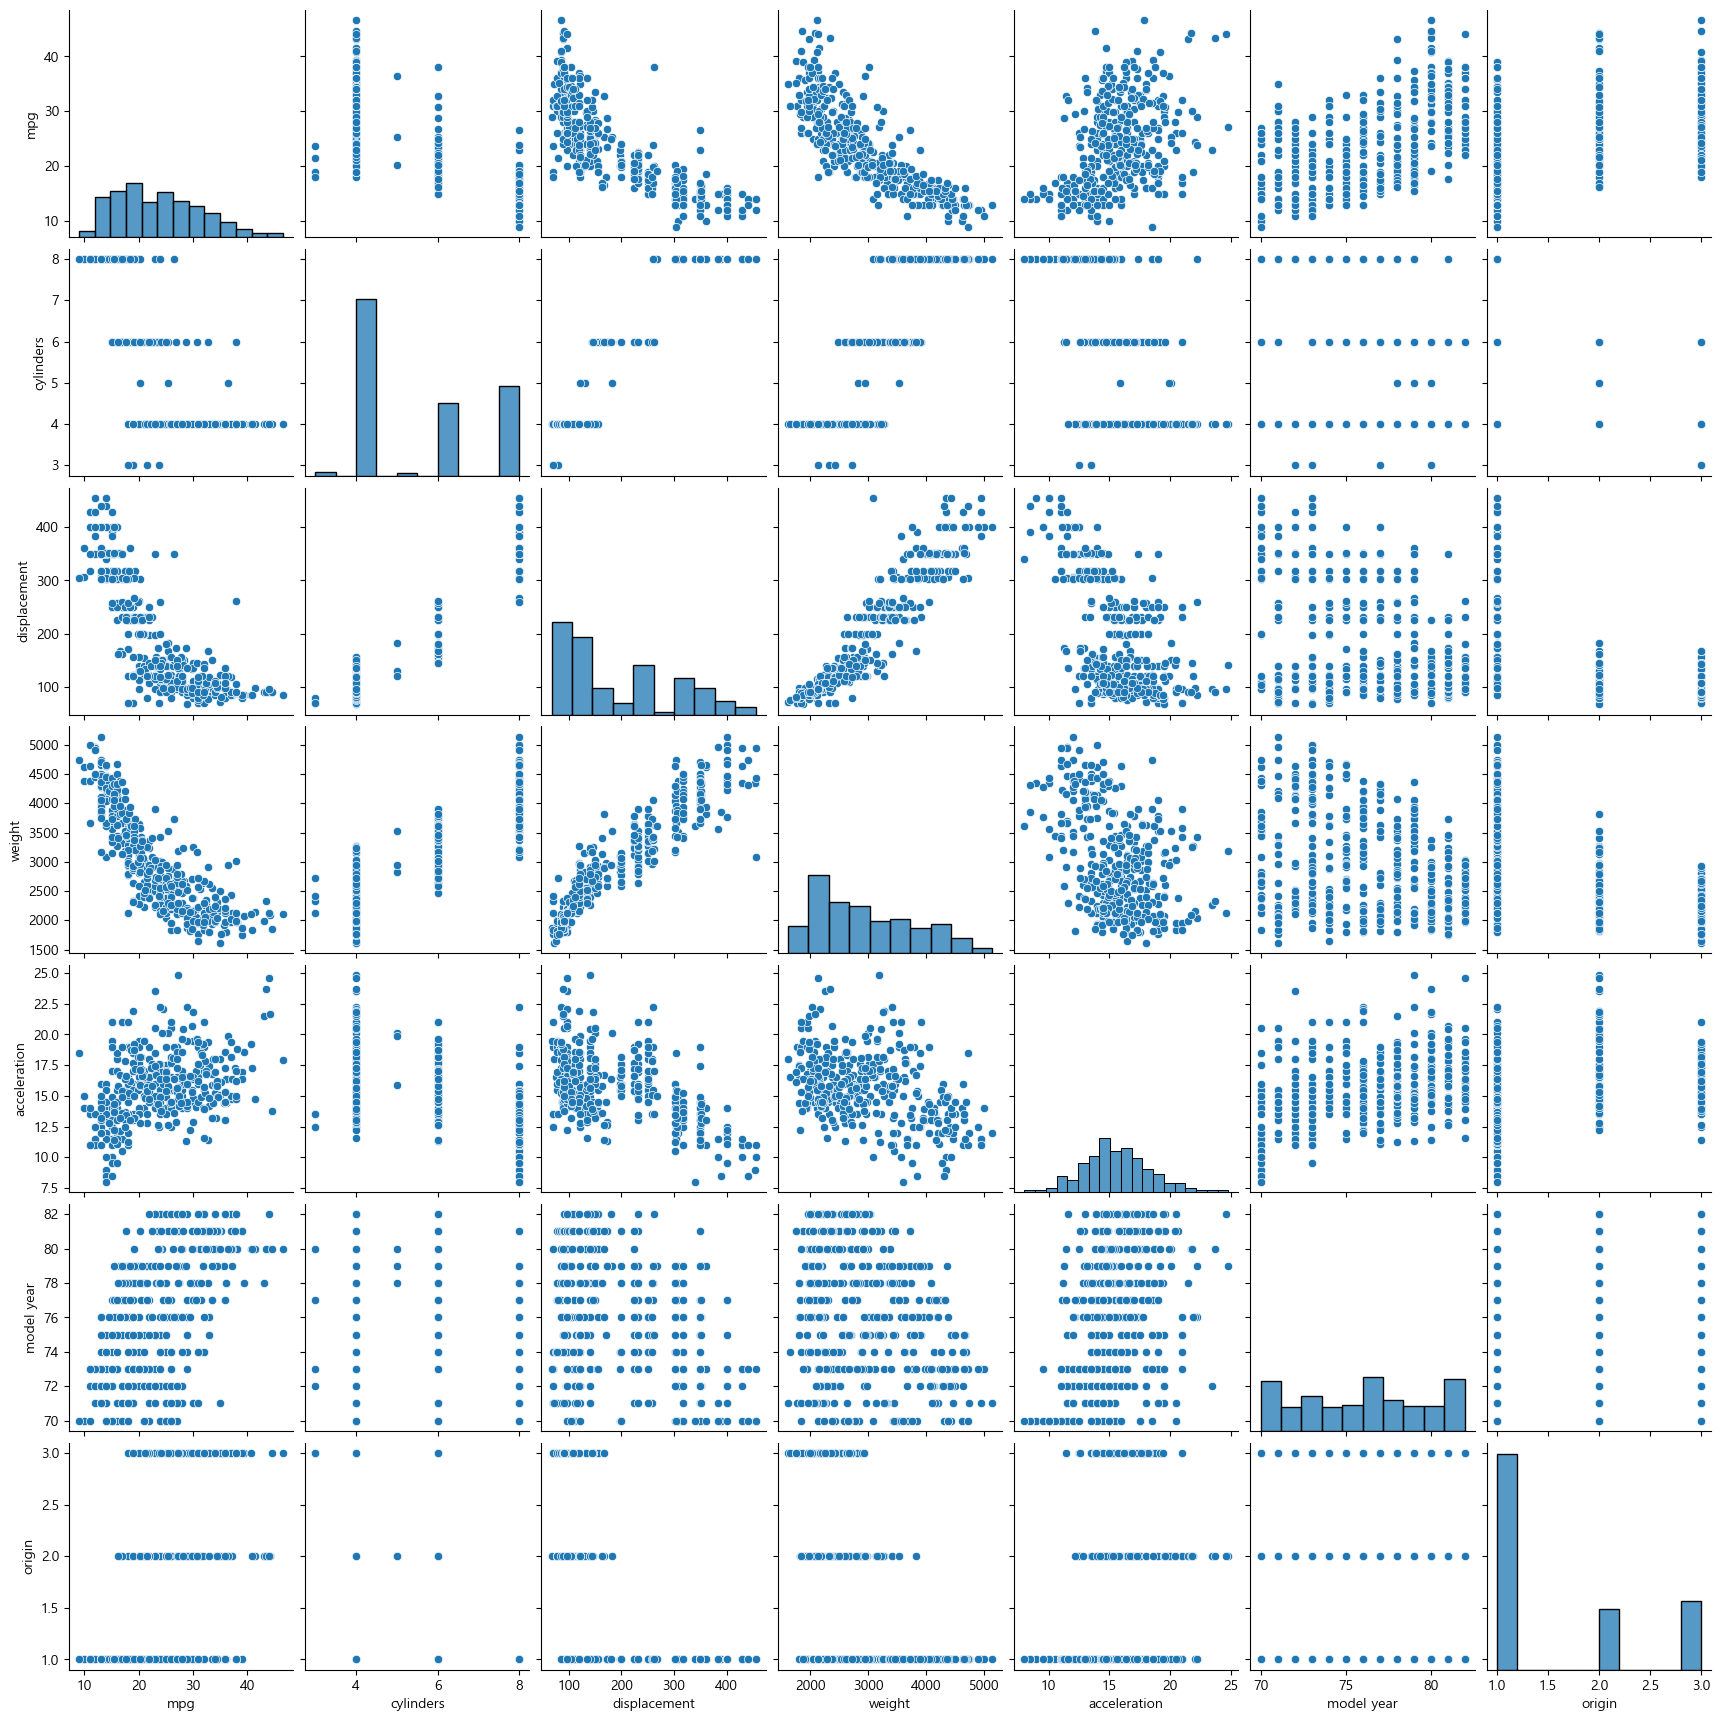

In [6]:
import seaborn as sns
#데이터 프래임에 존재하는 모든 숫자 컬럼들의 산점도를 전부 출력
sns.pairplot(mpg)

In [11]:
#상관 계수 구하기
mpg[["mpg", "cylinders", "displacement", "weight"]].corr()

,mpg,cylinders,displacement,weight
mpg,1.000,-0.775,-0.804,-0.832
cylinders,-0.775,1.000,0.951,0.896
displacement,-0.804,0.951,1.000,0.933
weight,-0.832,0.896,0.933,1.000


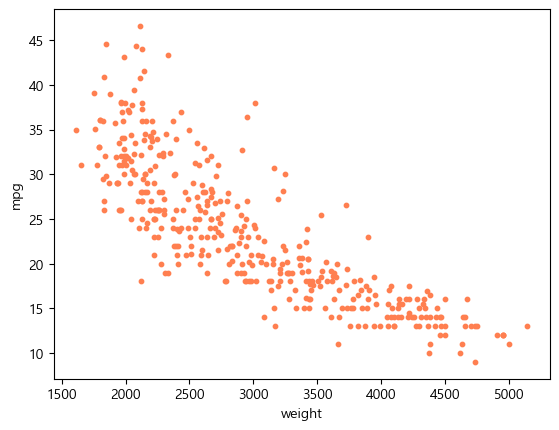

In [10]:
# DataFrame의 산점도 : weight 와 mpg는 음의 상관 관계가 있는 것으로 보임
mpg.plot(kind ='scatter', x ='weight', y = 'mpg', c = 'coral', s =10)
plt.show()

<Axes: xlabel='weight', ylabel='mpg'>

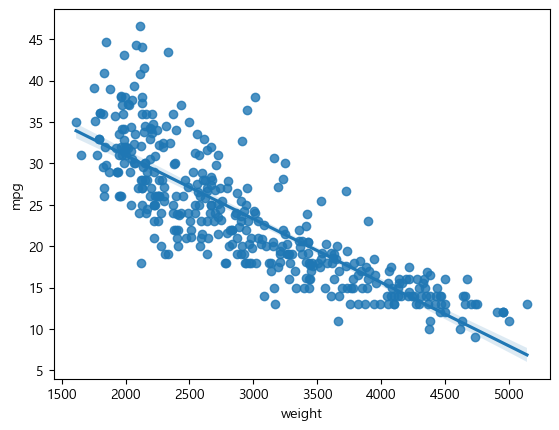

In [7]:
# 회귀선과 같이 출력
sns.regplot(x = 'weight', y = 'mpg', data = mpg)

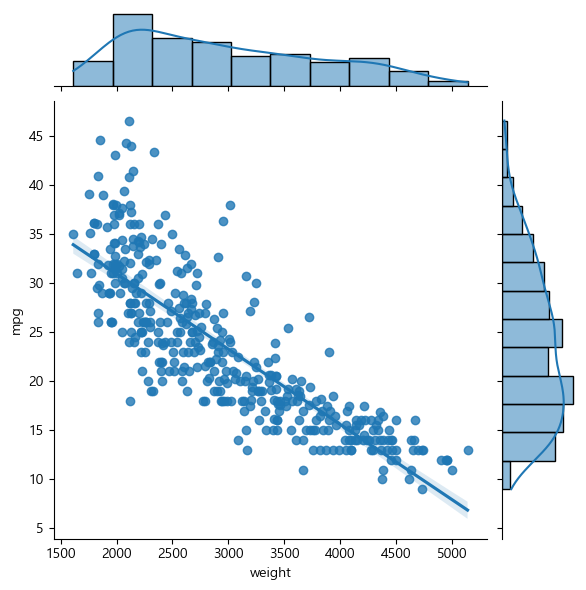

In [12]:
# 산점도와 데이터의 분호를 같이 출력
sns.jointplot(x = 'weight', y = 'mpg', kind = 'reg', data = mpg)

### gz 로 압축된 파일을 읽어오기

In [14]:
sp500_sym = pd.read_csv('python_statistics/data/sp500_sectors.csv')
sp500_px = pd.read_csv('python_statistics/data/sp500_data.csv.gz', index_col = 0)
# sp500_sym.head()

sp500_px.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060,-0.022,0.0,0.0,0.019,0.007,0.092,0.259,-0.007,...,0.0,0.0,0.347,0.0,0.042,0.000,0.016,1.75,0.125,0.0
1993-02-01,0.0,-0.180,0.028,0.0,0.0,0.019,0.018,0.115,-0.101,0.064,...,0.0,0.0,-0.231,0.0,0.000,-0.010,0.008,1.25,0.125,0.0
1993-02-02,0.0,-0.120,0.036,0.0,0.0,-0.076,0.029,-0.023,0.029,-0.014,...,0.0,0.0,-0.116,0.0,0.000,0.000,-0.008,-0.25,0.000,0.0
1993-02-03,0.0,0.060,-0.025,0.0,0.0,-0.151,0.004,-0.253,-0.043,-0.007,...,0.0,0.0,-0.087,0.0,0.042,-0.042,-0.039,-0.50,0.062,0.0
1993-02-04,0.0,-0.361,-0.061,0.0,0.0,0.113,-0.022,0.070,0.000,-0.007,...,0.0,0.0,0.145,0.0,-0.042,-0.031,-0.047,0.00,0.062,0.0


### 앤스콤 데이터

In [18]:
#데이터의 분포를 피어슨 상관계수만으로 판단하면 안됨

#데이터 가져오기
import statsmodels.api as sm
data = sm.datasets.get_rdataset('anscombe')
df = data.data
# print(df)


    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


In [20]:
# 피어슨 상관계수 확인
print(df['x1'].corr(df['y1']))
print(df['x2'].corr(df['y2']))
print(df['x3'].corr(df['y3']))
print(df['x4'].corr(df['y4']))

0.81642051634484
0.8162365060002428
0.8162867394895984
0.8165214368885028


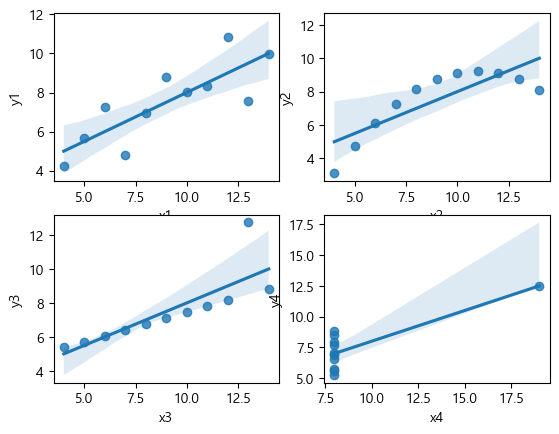

In [23]:
#데이터 분포 시각화

plt.subplot(221)
sns.regplot(x = 'x1', y= 'y1', data =df)

plt.subplot(222)
sns.regplot(x = 'x2', y= 'y2', data =df)

plt.subplot(223)
sns.regplot(x = 'x3', y= 'y3', data =df)

plt.subplot(224)
sns.regplot(x = 'x4', y= 'y4', data =df)

plt.show()

## 스피어만 상관계수

피어슨 상관계수 : 0.9731236802019037
스피어만 상관계수: 0.9999999999999999


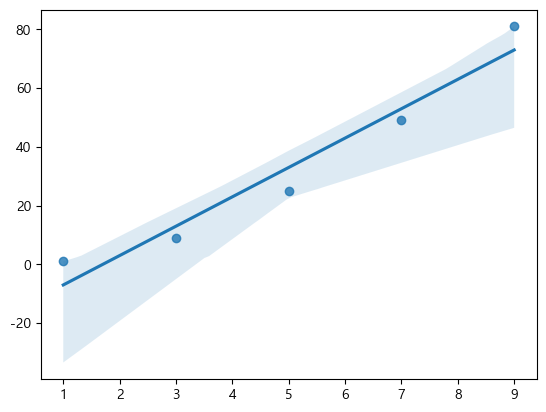

In [29]:
s1 = pd.Series([1, 3, 5, 7, 9])
s2 = pd.Series([1, 9, 25, 49, 81])
sns.regplot(x = s1, y = s2)

# 피어슨 상관계수
print('피어슨 상관계수 :' , s1.corr(s2))

#스피어만 상관계수 - 비선형의 경우는 조금 더 정확하게 반영
print('스피어만 상관계수:', s1.corr(s2, method = 'spearman'))

In [31]:
# 앤스콤 데이터의 스피어만 상관 계수
# 앤스콤 데이터의 경우 피어슨 상관계구는 모든 그룹이 유사했지만
# 스피어만 상관 계수를 이용하면 값의 편차가 심해진다
print("1의 스피어만 상관계수 :", sp.stats.spearmanr(df['x1'], df['y1']))
print("2의 스피어만 상관계수 :", sp.stats.spearmanr(df['x2'], df['y2']))
print("3의 스피어만 상관계수 :", sp.stats.spearmanr(df['x3'], df['y3']))
print("4의 스피어만 상관계수 :", sp.stats.spearmanr(df['x4'], df['y4']))


1의 스피어만 상관계수 : SignificanceResult(statistic=0.8181818181818182, pvalue=0.0020831448404786904)
2의 스피어만 상관계수 : SignificanceResult(statistic=0.690909090909091, pvalue=0.018565033381595004)
3의 스피어만 상관계수 : SignificanceResult(statistic=0.990909090909091, pvalue=3.762571807085399e-09)
4의 스피어만 상관계수 : SignificanceResult(statistic=0.5, pvalue=0.11730680301423815)


### 켄달 상관계수

In [32]:
# 피어슨 상관계수
print('피어슨 상관계수 :' , s1.corr(s2))

#스피어만 상관계수 - 비선형의 경우는 조금 더 정확하게 반영
print('스피어만 상관계수:', s1.corr(s2, method = 'spearman'))

#켄달 상관계수 - 비선형의 경우는 조금 더 정확하게 반영
print('켄달 상관계수:', s1.corr(s2, method = 'kendall'))

피어슨 상관계수 : 0.9731236802019037
스피어만 상관계수: 0.9999999999999999
켄달 상관계수: 0.9999999999999999


In [33]:
# 앤스콤 데이터의 켄달 상관 계수

#피어슨 상관계수보다는 비선형에서 조금더 나은 결과를 만들어내고 이상치에 대해서도
#Robust하다
print("1의 켄달 상관계수 :", sp.stats.kendalltau(df['x1'], df['y1']))
print("2의 켄달 상관계수 :", sp.stats.kendalltau(df['x2'], df['y2']))
print("3의 켄달 상관계수 :", sp.stats.kendalltau(df['x3'], df['y3']))
print("4의 켄달 상관계수 :", sp.stats.kendalltau(df['x4'], df['y4']))


1의 켄달 상관계수 : SignificanceResult(statistic=0.6363636363636364, pvalue=0.005707170915504249)
2의 켄달 상관계수 : SignificanceResult(statistic=0.5636363636363636, pvalue=0.016540504248837583)
3의 켄달 상관계수 : SignificanceResult(statistic=0.9636363636363636, pvalue=5.511463844797178e-07)
4의 켄달 상관계수 : SignificanceResult(statistic=0.42640143271122083, pvalue=0.11384629800665805)


## 수치형 데이터 시각화

### 산점도

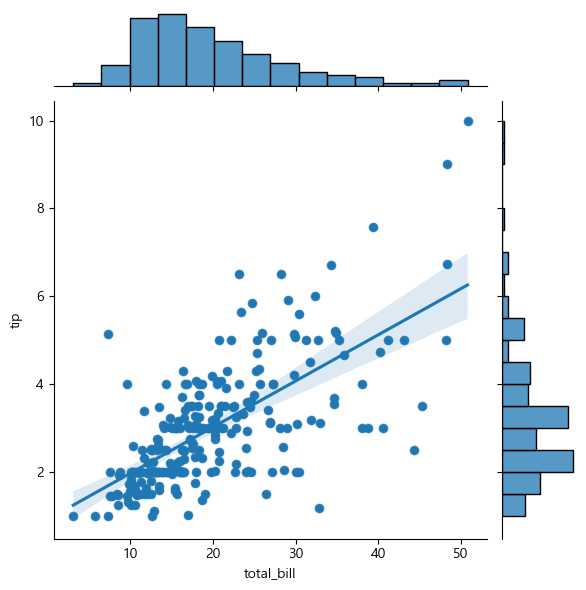

In [38]:
tips = sns.load_dataset('tips')

sns.jointplot(x = 'total_bill', y = 'tip',data = tips, kind = 'scatter')
sns.regplot(x = 'total_bill', y = 'tip',data = tips)
plt.show()

### 육각형 차트

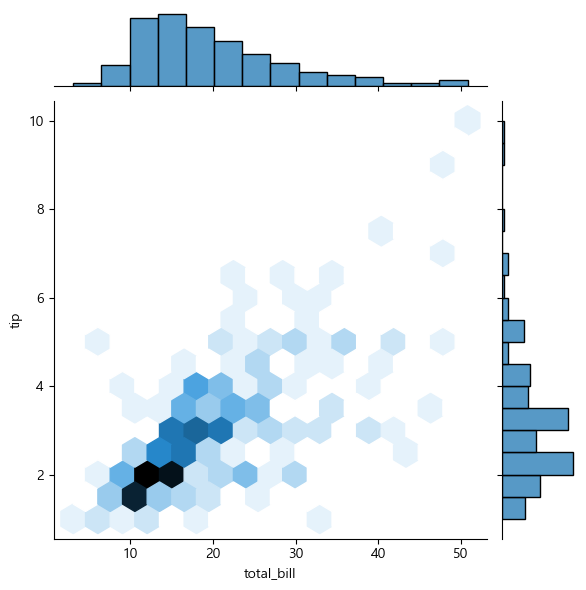

In [41]:
tips = sns.load_dataset('tips')

sns.jointplot(x = 'total_bill', y = 'tip',data = tips, kind = 'hex')

### 등고선 차트

In [47]:
kc_tax = pd.read_csv('python_statistics/data/kc_tax.csv.gz')
print('raw data :', kc_tax.shape)

# 필터링
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) & 
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), : ]
print('filter data :', kc_tax0.shape)

raw data : (498249, 3)
filter data : (432693, 3)


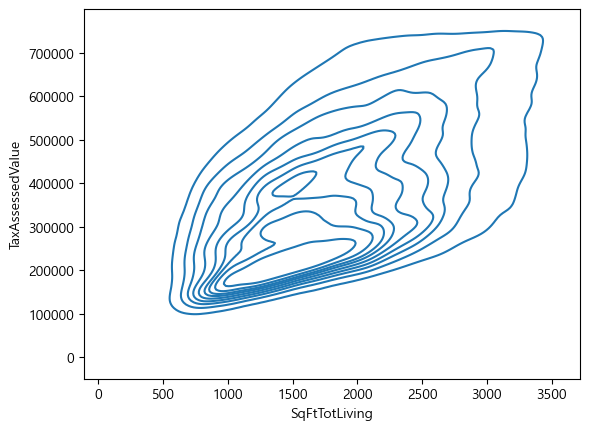

In [48]:
sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue')
plt.show()

## 범주형 데이터 시각화

### 교차 분할표

#### Pivot_table

In [55]:
# 데이터읽어서 grade와 status 의 교차 분할 표 작성
lc_loans = pd.read_csv('python_statistics/data/lc_loans.csv')
# lc_loans.head()
# lc_loans.infoa()
# lc_loans.shape

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [56]:
result = lc_loans.pivot_table(index = 'grade', columns = 'status',
                              aggfunc= lambda x : len(x), margins = True)
print(result)

status  Charged Off  Current  Fully Paid  Late     All
grade                                                 
A              1562    50051       20408   469   72490
B              5302    93852       31160  2056  132370
C              6023    88928       23147  2777  120875
D              5007    53281       13681  2308   74277
E              2842    24639        5949  1374   34804
F              1526     8444        2328   606   12904
G               409     1990         643   199    3241
All           22671   321185       97316  9789  450961


In [61]:
# 비율 출력 - grade의 합계를 제외한 부분을 가져오기
df = result.copy().loc['A' : 'G', :]
df.loc[:, 'Charged Off' : 'Late'] = df.loc[:, 'Charged Off' : 'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])

print(df)


status  Charged Off  Current  Fully Paid   Late    All
grade                                                 
A             0.022    0.690       0.282  0.006  0.161
B             0.040    0.709       0.235  0.016  0.294
C             0.050    0.736       0.191  0.023  0.268
D             0.067    0.717       0.184  0.031  0.165
E             0.082    0.708       0.171  0.039  0.077
F             0.118    0.654       0.180  0.047  0.029
G             0.126    0.614       0.198  0.061  0.007


## 범주형과 수치형 데이터의 시각화

### boxplot

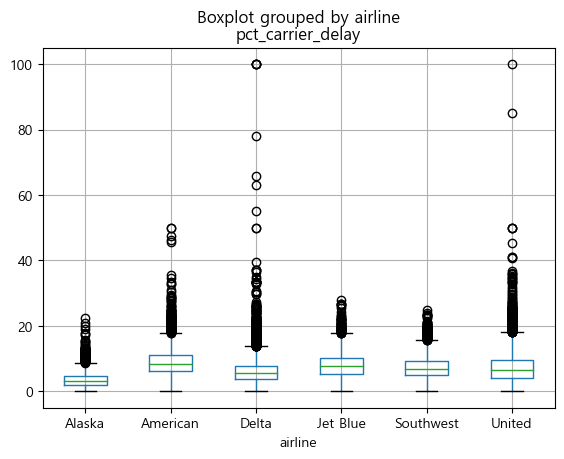

In [65]:
airline_stats = pd.read_csv('python_statistics/data/airline_stats.csv')
# airline_stats.head()

airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay')
plt.show()

### violin plot

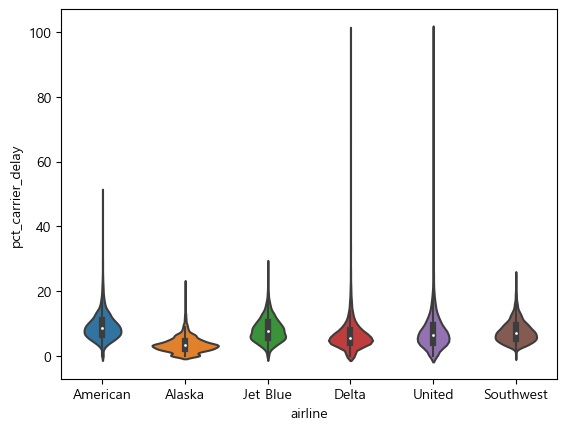

In [66]:
sns.violinplot(data = airline_stats, x = 'airline', y = 'pct_carrier_delay')
plt.show()

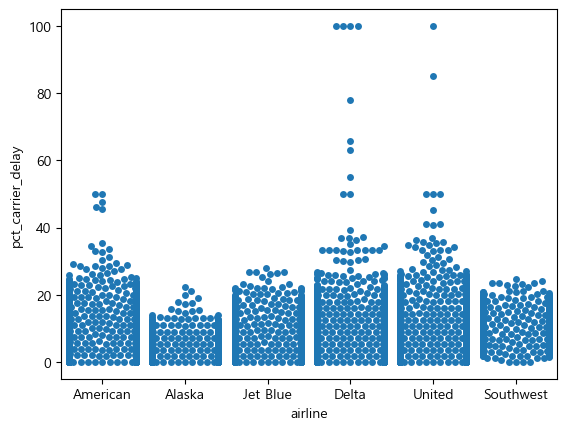

In [67]:
sns.swarmplot(data = airline_stats, x = 'airline', y = 'pct_carrier_delay')
plt.show()

## 모멘트 계산

In [78]:
# 샘플 데이터 생성
np.random.seed(222)
x = np.random.normal(size = 1000)
# print(x)

print('표본 평균 : ', np.mean(x))
print('1차 모멘트 : ', sp.stats.moment(x, 1))
print()
print('표본 분산 : ', np.var(x))
print('2차 모멘트 : ', sp.stats.moment(x, 2))
print()

# 왜도는 중앙을 기준으로 좌우로 펼쳐지는 정도
# print('표본 왜도 : ', np.skew(x)) # numpy 에선 지원 안함
print('표본 왜도 : ', sp.stats.skew(x))
print('3차 모멘트 : ', sp.stats.moment(x, 3))
print()

# 첨도는 정규 분포보다 중앙에 값이 몰려있는 정도
# 값이 3이면 정규분포와 동일하다고 본다. 
# 3보다 작으면 정규분포 보다 꼬리가 얇은 분포 (넓게 펼처짐)
# 3보다 크면 정규분포 보다 꼬리가 두꺼운 분포 (좁고 뾰족)

# 정규 분포의 첨도는 3인데, 해석을 편하게 위해서 3을 빼서 0을 만들기도 하는데
# excess kurtosis 라고 합니다.
# 2개의 값이 다른 이유는 kurtosis는 4차 모멘트에서 3을 뺀 값!
print('표본 첨도 : ', sp.stats.kurtosis(x))
print('4차 모멘트 : ', sp.stats.moment(x, 4))


표본 평균 :  0.011290741146952686
1차 모멘트 :  0.0

표본 분산 :  0.9963838429595335
2차 모멘트 :  0.9963838429595335

표본 왜도 :  0.14814554601814062
3차 모멘트 :  0.14734269658225838

표본 첨도 :  -0.0908482748437236
4차 모멘트 :  2.8881498679602817


## 확률 분포 함수

### 확률 질량 함수

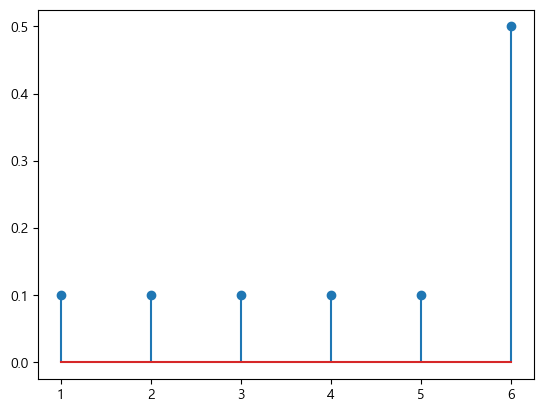

In [80]:
# 주사위의 각 눈을 나타내는 수 - 사건
x = np.arange(1, 7)

# 확률
y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.5])

# 각 사건에 대한 확률을 출력 - 확률 질량 함수
plt.stem(x, y)
plt.show()

## Scipy

### 정규 분포 객체의 확률 밀도 함수

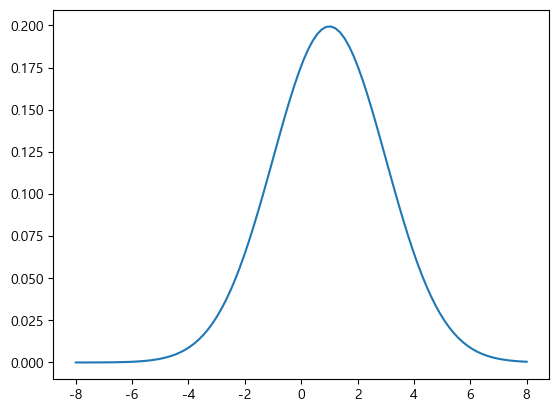

In [82]:
xx = np.linspace(-8, 8, 100)

# 정규 분포 객체 생성
rv = sp.stats.norm(loc = 1, scale = 2)

# 확률 밀도 함수
pdf = rv.pdf(xx)

plt.plot(xx, pdf)
plt.show()    

### 정규 분포 객체의 누적 분포 함수

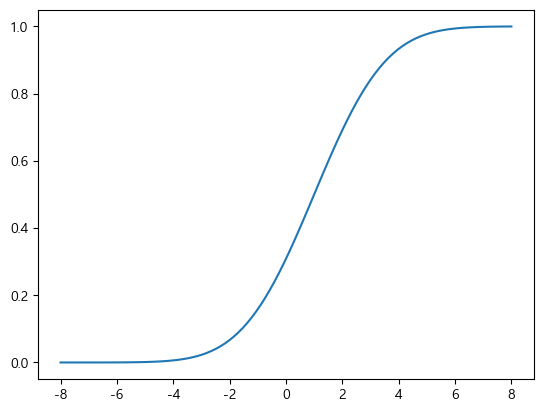

In [83]:
xx = np.linspace(-8, 8, 100)

# 정규 분포 객체 생성
rv = sp.stats.norm(loc = 1, scale = 2)

# 확률 밀도 함수
cdf = rv.cdf(xx)

plt.plot(xx, cdf)
plt.show()    

## 확률 분포 모형

### 베르누이 분포

#### 확률 질량 함수

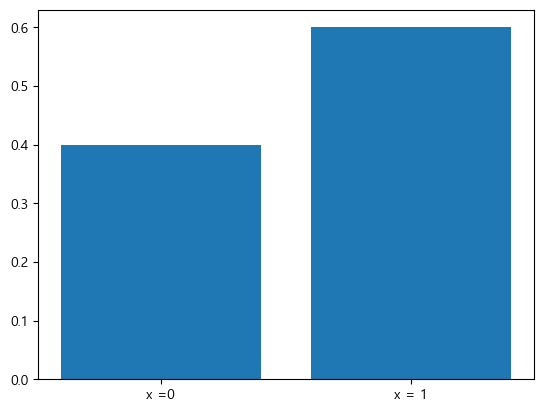

In [88]:
# 베르누이 분포는 1이 나올 확률을 이용해서 생성
rv = sp.stats.bernoulli(0.6)

# print(rv)
# 나올 수 있는 경우의 수
xx = [0, 1]

# 확률 질량함수
plt.bar(xx, rv.pmf(xx))

# x 축 수정
plt.xticks([0, 1], ['x =0', 'x = 1'])
plt.show()

#### 시뮬레이션

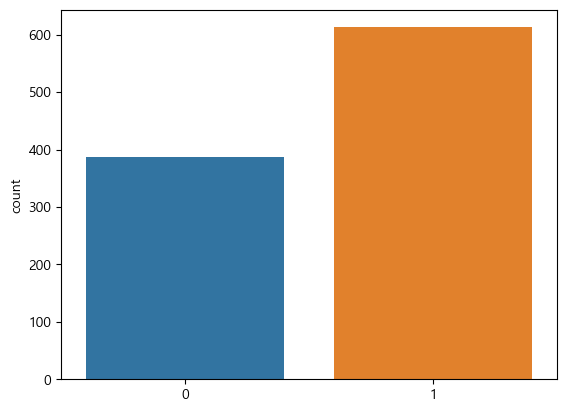

In [90]:
# 샘플 데이터 생성
# random_state : seed 설정
x = rv.rvs(1000, random_state = 42)

sns.countplot(x=x)

plt.show()

#### 이론과 시뮬레이션 한 결과를 비교

In [94]:
# 실제로는 이론과 비교하는 것이 아니고 주장과 비교
# 여러차례 시뮬레이션을 한 결과가 비교를 해서 주장이 어느 정도 타당성을 갖는지 확인

# 시뮬레이션 결과의 비율
y = np.bincount(x, minlength = 2) / float(len(x))
print(y)

# 이론 과 시뮬레이션 결과를 하나의 데이터 프레임으로 작성
df = pd.DataFrame({'이론' : rv.pmf(xx), '시뮬레이션' : y})
df.index = [0, 1]
print(df)

# 시뮬레이션 결과
result = sp.stats.describe(x)
print(result)

[0.387 0.613]
    이론  시뮬레이션
0  0.4  0.387
1  0.6  0.613
DescribeResult(nobs=1000, minmax=(0, 1), mean=0.613, variance=0.23746846846846847, skewness=-0.46400506298458166, kurtosis=-1.7846993015246748)


#### 확률 질량 함수

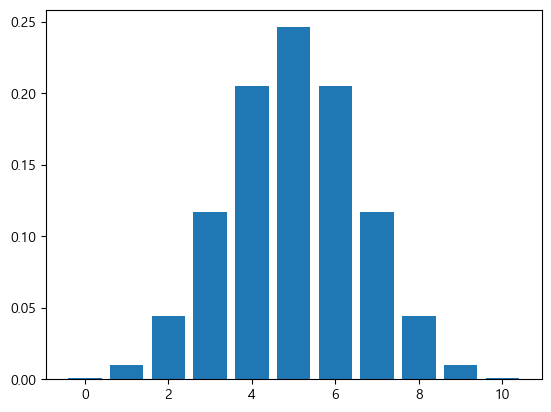

In [95]:
rv = sp.stats.binom(10, 0.5) #  1이 나올 확률은 0.5 이고 10번 수행

xx = np.arange(11)
plt.bar(xx, rv.pmf(xx), align = 'center')
plt.show()

#### 시뮬레이션

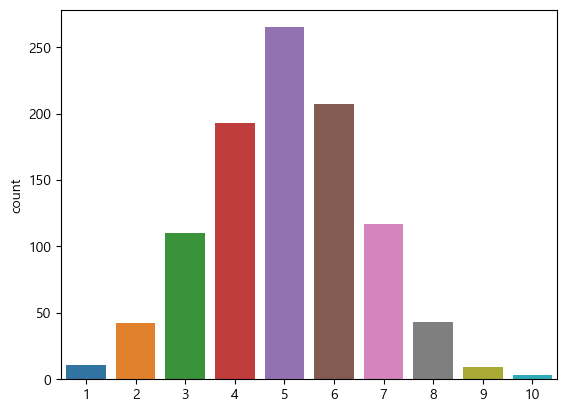

[ 9  9  9  9  9  9  9 10 10  9  9 10]


In [98]:
x = rv.rvs(1000)

sns.countplot(x =x)
plt.show()

print(x[x>8])

In [99]:
#### 앞 뒷면이 나오는 확률이 동일한 동전을 100번 던졌을 때 앞면이 60회 이상 나올 확률

# 해결책

#pmf 를 이용하는 방법 : 0 ~59 까지 나올 확률을 모두 더 한 후 1에서 확률을 빼면 됩니다.

#cdf 를 이용하는 방법
p = sp.stats.binom.cdf(n=100, p = 0.5, k = 59)
print(1 - p)

# sf를 이용하는 방법
p = sp.stats.binom.sf(n = 100, p= 0.5, k = 59)
print(p)

0.02844396682049044
0.028443966820490392


#### 동일한 경우에 앞면이 20~60 번 나올 확률

In [100]:
# 60까지의 cdf에서 19까지 cdf빼면 되는거 아니야..?

p1 = sp.stats.binom.cdf(n=100, p =0.5 , k =19)
p2 = sp.stats.binom.cdf(n=100, p =0.5 , k =60)

print(p2 - p1)

0.9823998997560095


#### 퍼센트 포인트 함수 ppf

In [108]:
# 동전을 던졌을 때 n회 이상이 나올  확률이 80%가 넘는 지점은?

p = sp.stats.binom.ppf(n = 100, p = 0.5, q =0.8)
print(p)

p1= sp.stats.binom.cdf(n=100, p = 0.5, k = p-1)
p2= sp.stats.binom.cdf(n=100, p = 0.5, k = p)

print(p1)
print(p2)



54.0
0.7579407931963542
0.8158991913366521


#### 확률 질량 함수

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


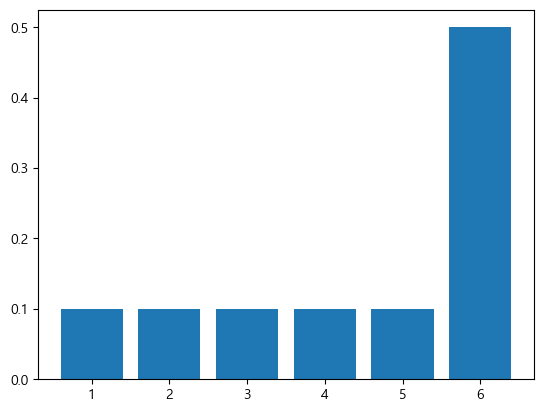

In [118]:
# 카테고리 별 확률 - 주사위의 확률
mu = [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]

#카테고리 분포 인스턴스 생성
rv = sp.stats.multinomial(1, mu)

# 데이터 생성
xx = np.arange(1, 7)

# 원 핫 인코딩
xx_ohe = pd.get_dummies(xx)
print(type(xx_ohe))

# 확률 질량 함수 출력
# 통계, scikit-learn 을 이용하는 전처리 그리고 머신러닝에서는
#numpy 의 ndarray가 기본 자료형
print(type(xx_ohe.values))
plt.bar(xx, rv.pmf(xx_ohe.values))
plt.show()

#### 시뮬레이션

In [121]:
X = rv.rvs(100)
# print(X)



[[0 0 0 1 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 ...
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]]


## 다항 분포 - 카테고리 분포를 여러 번 수행한 분포

In [126]:
# 확률이 동일한 주사위
rv = sp.stats.multinomial(1, [1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

#1000실행
X = rv.rvs(100)
# 앞에 20개를 출력
print(X[: 20])



[[1 0 0 0 0 0]
 [0 1 0 0 0 0]
 [0 0 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 1 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [1 0 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]
 [0 0 0 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 0 1 0]]


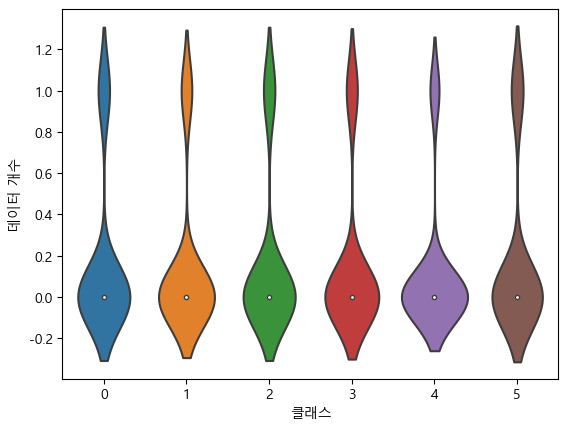

In [128]:
# 시각화
df = pd.DataFrame(X).stack().reset_index()
df.columns = ['시도', '클래스', '데이터 개수']
# print(df.head())

sns.violinplot(x = '클래스', y = '데이터 개수', data = df)
plt.show()

## 오잉...?